# Quick Notes: Linear Regression & Error Metrics

## 1. Simple Linear Regression
Model: ŷ = β0 + β1 x  
Goal: find β0, β1 minimizing squared residuals.

Formulas (OLS):
β1 = Σ(xi - x̄)(yi - ȳ) / Σ(xi - x̄)²  
β0 = ȳ − β1 x̄  
Residual (error): ri = yi − ŷi  

SSE (Sum of Squared Errors): SSE = Σ ri²  
MSE (Mean Squared Error): MSE = SSE / n   (sometimes / (n−2) for unbiased variance of residuals)  

## 2. Ordinary Least Squares (OLS)
Chooses β0, β1 that minimize SSE = Σ(yi − (β0 + β1 xi))².

## 3. Error Metrics
MAE (Mean Absolute Error): MAE = (1/n) Σ |ri|  
MSE (Mean Squared Error): MSE = (1/n) Σ ri²  
RMSE (Root Mean Squared Error): RMSE = sqrt(MSE)  
Relative Absolute Error (RAE): RAE = (Σ |ri|) / (Σ |yi − ȳ|)  
(Interpretation: RAE < 1 means model better than predicting mean.)

## 4. When to Prefer
- MAE: robust to outliers (linear penalty)
- MSE / RMSE: penalizes larger errors more (squared)
- RMSE: same unit as target (easier to interpret)
- RAE: scale-free comparison vs naive mean model


In [5]:
import pandas as pd

df =  pd.read_csv('01Students.csv')

X = df.iloc[:, :-1]  # hours column 
Y = df.iloc[:,-1]  # marks 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12323)

regressor =  LinearRegression()

regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_predict =  regressor.predict(x_test)

## 7. Decomposition & R²

Notation (yi actual, ŷi predicted, ȳ mean of y):
- Total Sum of Squares (SST): Σ(yi − ȳ)²  (total variability in y)
- Residual Sum of Squares (SSE): Σ(yi − ŷi)²  (unexplained)
- Regression Sum of Squares (SSR): Σ(ŷi − ȳ)²  (explained)  
  Relation: SST = SSR + SSE

R² (Coefficient of Determination):
R² = 1 − (SSE / SST) = SSR / SST  
Meaning: Proportion of variance in y explained by the model.  
Range: 
- 1 = perfect fit
- 0 ≈ no improvement over predicting mean
- < 0 worse than mean model (can happen on test data)

Adjusted R² (penalizes extra predictors):
Adj R² = 1 − (1 − R²) * (n − 1) / (n − p − 1)
(n = samples, p = number of predictors)

Quick Interpretation:
- Higher R² is not always better (beware overfitting)
- Compare models using Adjusted R² when p changes
- Use residual plots to validate linear assumptions

In [ ]:
# R squared --> coefficient of determination 
# how much is variation in Y is described by varation in X
slr_score=  regressor.score(x_test, y_test)

# coefficient of line
slr_coefficient = regressor.coef_
slr_intercept = regressor.intercept_

# Y = slr_intercept +  slr_coefficient * x


In [9]:
# Find out root mean squared error 
# actual error 
from sklearn.metrics import mean_squared_error
import math


rmse =  math.sqrt(mean_squared_error(y_test,y_predict))
rmse



8.066224327038645

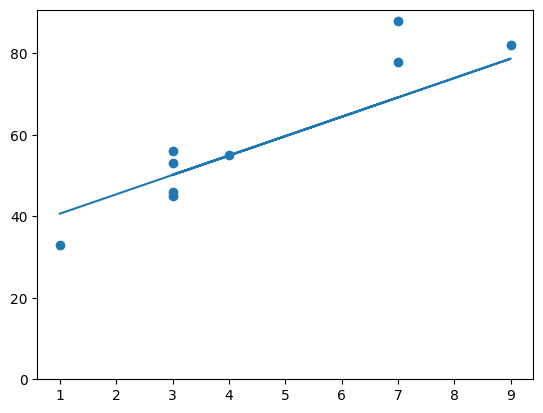

In [10]:
# plot result 

import matplotlib.pyplot as plt

plt.scatter(x_test,y_test)

plt.plot(x_test, y_predict)
plt.ylim(ymin=0)
plt.show()